In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec

data = dict()

Measures = [6,8,10,11,12,13,14,16,18]
for i in range(0,len(Measures)):
    n = Measures[i]

    #setting all adresses
    Vadress = "Meshdata/VerticesRing" + str(n) +".txt"
    Eadress = "Meshdata/EdgesRing" + str(n) +".txt"
    Fadress = "Meshdata/FacesRing" + str(n) +".txt"
    Soladress = "Solutions/PoissonGaussSolutionRing" + str(n) + ".txt"

    #loading data in dictionary
    data['V'+str(n)] = np.genfromtxt( Vadress )
    data['E'+str(n)] = np.genfromtxt( Eadress )
    data['F'+str(n)] = np.genfromtxt( Fadress )
    data['Sol'+str(n)] = np.genfromtxt( Soladress )



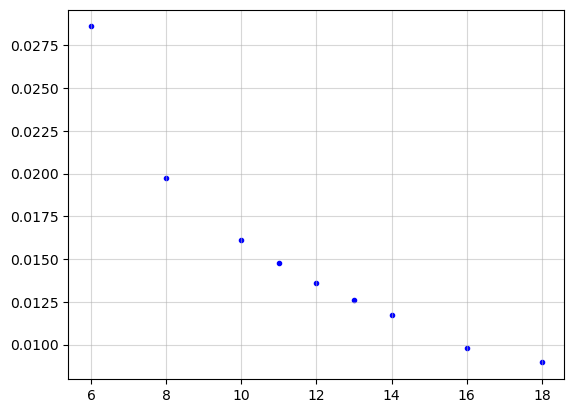

In [10]:
def AnaPot( x,y ):
    r = ((x-0.5)**2 + (y-0.5)**2)**0.5
    Val = math.exp(-10.*r**2)
    return Val

plt.grid(alpha=0.5)
for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Sol'+str(n)]
    SquaredDisplacment = 0

    for j in range(0,len(V)):
        x = V[j][0]
        y = V[j][1]
        SquaredDisplacment += (Sol[i]-AnaPot(x,y))**2

    MSD = math.sqrt(SquaredDisplacment)/(len(V)-1)
    plt.scatter(n,MSD,marker='.',color='b')


Text(0, 0.5, 'mean relative error')

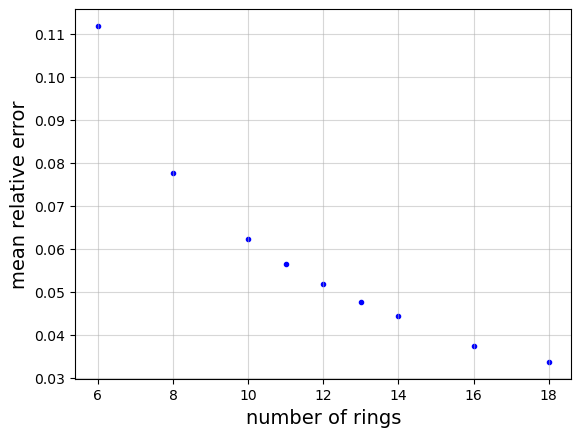

In [13]:
plt.grid(alpha=0.5)
for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Sol'+str(n)]
    SquaredDisplacment = 0

    for j in range(0,len(V)):
        x = V[j][0]
        y = V[j][1]
        SquaredDisplacment += abs(Sol[i]-AnaPot(x,y))/(AnaPot(x,y))

    MSD = math.sqrt(SquaredDisplacment)/(len(V)-1)
    plt.scatter(n,MSD,marker='.',color='b')
plt.xlabel('number of rings',fontsize=14)
plt.ylabel('mean relative error', fontsize=14)
    
